# Lorentz Transformations

In [2]:
from __future__ import (division, print_function, absolute_import)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

We are looking for a linear transformation between the coordinates of events in the unprimed system and their counterparts in the primed coordinate system. And we assume that the required four parameters of this transformation are themselves functions of the relative velocity $v$.
We call that transformation a Lorentz-Transformation and denote it with $L_v(t, x)$.

$$
L_v(t, x) =
\left( \begin{array}{c c}
a_1(v) & a_2(v) \\
b_1(v) & b_2(v)
\end{array}
\right) \cdot 
\left( \begin{array}{c c}
t \\
x
\end{array}
\right) 
=
\left( \begin{array}{c c}
t^\prime \\
x^\prime
\end{array}
\right)
$$

If we find four different situations with known $x, t, x^\prime, t^\prime$, then we can hope to end up with a system of four equations for four unknowns, and hopefully that system is actually solvable. It turns out it is. Here are the four known situations:
- We know what the origin of the moving system looks like in both coordinate systems
- We know what the origin of the resting system looks like in both coordinate systems, since it must appear to move with $v^\prime=-v$ in the primed system.
- We know that the speed of light is the same in both systems.
- And finally we demand that the net result of consecutively applying a transformation $L_v(t,x)$ and its counterpart $L_{-v}(t,x)$ reproduces the original coordinates. Transforming into any system and back should have no net result.

1) Knowing that the origin of the primed system has $x^\prime=0$ in its own coordinate system and $x=vt$ in the resting observer's system we get

$$
\left( \begin{array}{c c}
a_1 & a_2 \\
b_1 & b_2
\end{array}
\right) \cdot 
\left( \begin{array}{c c}
t \\
v t
\end{array}
\right) 
=
\left( \begin{array}{c c}
t^\prime \\
0
\end{array}
\right)
$$

$$
\Rightarrow b_1 + b_2 v = 0 \text{ (from the x-component)}
$$


2) Knowing that the origin of the resting system $x=0$ is viewed as moving with $v^\prime = -v$ from the moving system we conclude:

$$
\left( \begin{array}{c c}
a_1 & a_2 \\
b_1 & b_2
\end{array}
\right) \cdot 
\left( \begin{array}{c c}
t \\
0
\end{array}
\right) 
=
\left( \begin{array}{c c}
a_1 t \\
b_1 t
\end{array}
\right)
$$

$$ 
\Rightarrow v^\prime \equiv \frac{b_1}{a_1}=-v
$$

We can already eliminate one parameter from these two results: $a_1 = b_2$ and for historical reasons we give them the new name $\gamma$:

$$\gamma \equiv a_1 = b_2$$
$$ b_1 = -\gamma v$$

3) Knowing that the speed of light $c$ will be the same independent of the motion of the observer, we get

$$
\left( \begin{array}{c c}
\gamma & a_2 \\
-\gamma v & \gamma
\end{array}
\right) \cdot 
\left( \begin{array}{c c}
t \\
ct
\end{array}
\right) 
=
\left( \begin{array}{c c}
t^\prime \\
ct^\prime
\end{array}
\right)
$$

Which leaves us with the two independent equations

$$ \gamma t + a_2ct = t^\prime $$
$$ -\gamma vt + \gamma ct = ct^\prime $$

Replacing $t^\prime$ in the second equation by the left side of the first equation we get:

$$
-\gamma vt + \gamma ct = c(\gamma t + a_2ct)
$$

$$
\Rightarrow a_2 = \frac{-\gamma v}{c^2}
$$

We're almost done. We have it all apart from a *scaling* factor $\gamma$

$$
\gamma \cdot 
\left( \begin{array}{c c} 
1 & -\frac{v}{c^2} \\
-v & 1
\end{array}
\right) 
\cdot
\left( \begin{array}{c} 
t \\
x 
\end{array}
\right) 
=\left( 
\begin{array}{c} 
t^\prime \\
x^\prime
\end{array}
\right) 
$$


4) Any consecutive pair of transformations $L_v$ and $L_{-v}$ must leave the coordinates unchanged. That's straight-forward to express in mathematical terms:

$$
\gamma \cdot 
\left( \begin{array}{c c} 
1 & -\frac{v}{c^2} \\
-v & 1
\end{array}
\right) 
\cdot
\gamma \cdot 
\left( \begin{array}{c c} 
1 & +\frac{v}{c^2} \\
+v & 1
\end{array}
\right) 
=
\left( \begin{array}{c c} 
1 & 0 \\
0 & 1
\end{array}
\right) 
$$

which yields:

$$
\gamma = \frac{1}{\sqrt{1-\frac{v^2}{c^2}}}
$$

and thus concludes our derivation of the Lorentz transformation.

### The Lorentz transformation

$$
L_v(t, x) = 
\frac{1}{\sqrt{1-\frac{v^2}{c^2}}} 
\left( \begin{array}{c c} 
1 & -\frac{v}{c^2} \\
-v & 1
\end{array}
\right) 
\cdot
\left( \begin{array}{c} 
t \\
x 
\end{array}
\right) 
$$


In the following demonstration we measure distances in light seconds, which computationally amounts to setting $c=1$.

In [4]:
class LorentzTrafo:
    def __init__(self, v):
        self.v = v
        self.gamma = 1/np.sqrt(1-v*v)
        self.matrix = self.gamma * np.array([[1, -v], [-v, 1]])
        
    def __call__(self, obj):
        """
        Takes a single spacetime coordinates (t1, x1),
        or an array of spacetime coordinates [(t1, x1), (t2, x2), ...]
        or pairs of coordinates representing lines [[(t1, x1), (t2, x2)], [...]]
        and returns their respective Lorentz-boosted image
        """
        if len(np.shape(obj)) == 3 and np.shape(obj)[1:3] == (2,2):
            return self.transform_lines(obj)
        elif len(np.shape(obj)) == 1 and np.shape(obj)[0] == 2: 
            return np.matmul(self.matrix, np.transpose(obj)).T
        elif len(np.shape(obj)) == 2 and np.shape(obj)[1] == 2: 
            return np.matmul(self.matrix, np.transpose(obj)).T
        else:
            raise ValueError("Can't transform this object")

    def transform_lines(self, lines):
        """transform a set of pair of points (in one go)"""        
        points = np.reshape(lines, [-1, 2])
        transformed = self.__call__(points)
        return np.reshape(transformed, [-1, 2, 2])    

    
# Verifying:
v=.5
lt = LorentzTrafo(v)
res = lt([[4,2], [6,3]])
res[0], res[1], lt([[[4,2], [6,3]]])

(array([3.46410162, 0.        ]),
 array([ 5.19615242e+00, -2.22044605e-16]),
 array([[[ 3.46410162e+00,  0.00000000e+00],
         [ 5.19615242e+00, -2.22044605e-16]]]))

In [5]:
class MinkowskiGrid:
    """A class to hold a grid of space time events and the characteristic world lines"""
    def __init__(self, first, last, left, right, step, v=0.5):
    
        N_wl = 10
        
        self.line_color = '#F0C0C0'

        self.left = left
        self.right = right
        self.first = first
        self.last = last
        self.step = step
        self.v = v
        self.events=[]
        
        tr = range(first, last+1)
        self.xlines = [[[t, left], [t, right]] for t in range(first, last+1)]

        xr = range(left, right+1)
        self.tlines = [[[first, x], [last, x]] for x in range(left, right+1)]

        self.lines = np.append(self.xlines, self.tlines)
        
        self.points = np.array([(t, x) for x in range(left, right+1) 
                       for t in range(first, last+1)])

        self.other = list(zip(np.linspace(first, last, N_wl),
             np.linspace(first*v, last*v, N_wl)))

        self.mytime = [(t, 0) for t in np.linspace(0, last, N_wl)]
        
        r = list(zip(np.linspace(0, last, N_wl),
             np.linspace(0, last, N_wl)))
        l = list(zip(np.linspace(0, last, N_wl),
             np.linspace(0, -last, N_wl)))
        self.light_cone = np.append(r, l, axis=0)
        
    def record_events(self, events):
        self.events = events

    def boost(self, events):
        return LorentzTrafo(self.v)(events)

In [6]:
class MinkowskiPlot():

    def __init__(self, grid):
        self.grid = grid
        self.psize=60
    
    @staticmethod
    def to_mpl_lines(minkowski_lines, color):
        return np.array([[
            [p[0][1], p[1][1]], 
            [p[0][0], p[1][0]], 
            color] 
            for p in minkowski_lines]).reshape(-1)
        
    @staticmethod
    def to_mpl(tx):
        return np.transpose(zip(np.transpose(tx)[1],np.transpose(tx)[0]))
        
    def points_xy(self):
        return np.array(list(zip(self.grid.points.T[1], self.grid.points.T[0]))).T

    def mytime_xy(self, primed=False):
        mytime = LorentzTrafo(grid.v)(grid.mytime) if primed else grid.mytime
        return self.to_mpl(mytime)

    def light_xy(self, primed=False):
        light_cone = grid.boost(grid.light_cone) if primed else grid.light_cone
        return self.to_mpl(light_cone)

    def other_xy(self, primed):
        other = grid.boost(grid.other) if primed else grid.other
        return self.to_mpl(other)

    def events_xy(self, primed):
        events = grid.boost(grid.events) if primed else grid.events
        return self.to_mpl(events)
    
    def tlines_xy(self, color):
        return self.to_mpl_lines(self.grid.tlines, color)
    
    def xlines_xy(self, color):
        return self.to_mpl_lines(self.grid.xlines, color)
    
    def any_xy(self):
        return np.array([p for p in self.points_xy().T if not self.grid.is_light(p) 
                         and not self.grid.is_other(p) 
                         and not self.grid.is_mytime(p)])    

    
    def plot_grid(self, axis, color='#FFC0C0'):
        #axis.plot([self.grid.left, self.grid.right], [0, 0], 'k');
        axis.plot(*self.tlines_xy(color));
        axis.plot(*self.xlines_xy(color));

    def plot_mytime(self, axis, color='r', primed=False):
        axis.scatter(*self.mytime_xy(primed), color=color, marker='o', s=self.psize);
        axis.plot([0,0], [self.grid.first, self.grid.last], color);
    
    def plot_lightcone(self, axis, color='y', primed=False):
        axis.plot([self.grid.left, 0, self.grid.right], 
                  [self.grid.last, 0, self.grid.last], 'y');
        axis.scatter(*self.light_xy(primed), color='y', marker='o', s=self.psize);
    
    def plot_other(self, axis, color='b', primed=False):
        axis.plot([0,self.grid.v*self.grid.right], [0, self.grid.right], color);        
        axis.scatter(*self.other_xy(primed), color=color, marker='o', s=self.psize);

    def plot_events(self, axis, color='k', primed=False):
        axis.scatter(*self.events_xy(primed), color=color, marker='o', s=2.0*self.psize);
        
    def display(self, axis, primed=False):
        if primed:
            tlines_d=self.to_mpl_lines(grid.boost(grid.tlines), '#FFC0C0')
            xlines_d=self.to_mpl_lines(grid.boost(grid.xlines), '#FFC0C0')
            self.plot_grid(axis, color='#A0A0FF')
            axis.plot(*xlines_d, color='#FFD0D0');
            axis.plot(*tlines_d, color='#FFD0D0');
        else:
            self.plot_grid(axis, '#FFC0C0')
            
        self.plot_mytime(axis, 'r', primed)
        self.plot_lightcone(axis, 'y', primed)
        self.plot_other(axis, 'b', primed)
        if (grid.events):
            self.plot_events(axis, 'k', primed)

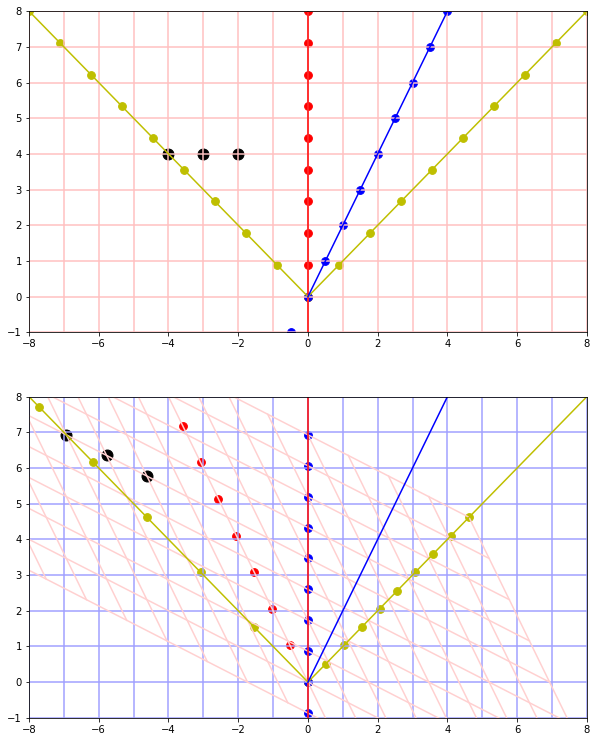

In [7]:
v=.5
grid = MinkowskiGrid(-1, 8, -8, 8, 1, v)
events=[[4, -2], [4, -3], [4, -4]]
grid.record_events(events)
plotter = MinkowskiPlot(grid)
_, plots = plt.subplots(2, figsize=(10,13))
for i in range(2):
    plots[i].set_xlim([-8, 8])
    plots[i].set_ylim([-1, 8])
plotter.display(plots[0], primed=False)
plotter.display(plots[1], primed=True)

We observe the following characteristics:
- Events that appear simultaneous in one reference frame (black dots) will not be observed as simultaneous from within a reference frame moving relative to the former.
- The light cones get stretched or squished but they are observed at the sample angle in space time, i.e the speed of light is constant, independent of the movement of the observer.
- The distance between the outer events (2 light seconds in the upper plot) after the boost is slightly longer than from the perspective of the moving observer

In [187]:
lt=LorentzTrafo(v)
lt(events)

array([[ 5.77350269, -4.61880215],
       [ 6.35085296, -5.77350269],
       [ 6.92820323, -6.92820323]])

In [ ]:
lt(events)[2][1]-lt(events)[0][1]-

In [160]:
v=.2
lt=LorentzTrafo(v)
i_see_him_at=[2, 1]
i_see_me_at=[2,0]
he_sees_me_at=lt(i_see_me_at)
he_got_my_speed_at=he_sees_me_at[1]/he_sees_me_at[0]
he_got_my_speed_at # hopefully -v

-0.2

In [161]:
v=.5 #any
lt=LorentzTrafo(v)
i_see_light_at=[2, 2]
he_sees_light_at=lt(i_see_light_at)
he_got_light_speed_at=he_sees_light_at[1]/he_sees_light_at[0]
he_got_light_speed_at # hopefully 1

1.0

In [184]:
lv = LorentzTrafo(.5).matrix
lmv = LorentzTrafo(-.5).matrix

In [185]:
np.matmul(lmv, lv)

array([[ 1.00000000e+00, -5.89226028e-18],
       [ 5.89226028e-18,  1.00000000e+00]])